Taiwanese Bankruptcy Study 

In this study, we focus on analyzing a dataset from the UCI Machine Learning Repository that predicts the likelihood of bankruptcy for Taiwanese companies. Our goal is to explore various financial indicators to identify patterns and trends associated with bankrupt and non-bankrupt companies. 

First, we install and import the necessary libraries, fetch the Taiwanese Bankruptcy Prediction dataset from the UCI Machine Learning Repository, and then display the first few rows of both the feature set (X) and the target variable (y). This initial step is crucial for setting up the dataset for further analysis and visualization.

In [42]:
import seaborn as sns
# Import the library and fetch the dataset
from ucimlrepo import fetch_ucirepo

# Fetch dataset
taiwanese_bankruptcy_prediction = fetch_ucirepo(id=572)

# Data (as pandas dataframes)
X = taiwanese_bankruptcy_prediction.data.features
y = taiwanese_bankruptcy_prediction.data.targets

# Display the first few rows of the features
print(X.head())

# Display the first few rows of the target variable
print(y.head())


   ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                   

In this step, we clean the column names of the dataset to remove any leading or trailing whitespace, ensuring consistency. We then verify the changes by printing the cleaned column names. Next, we calculate the average Return on Assets (ROA) for both bankrupt and non-bankrupt companies to identify any significant differences. Finally, we print these average ROA values to highlight the financial performance contrast between the two groups.

In [30]:
print(X.columns)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [31]:
X.columns = X.columns.str.strip()


In [32]:
# Clean the column names
X.columns = X.columns.str.strip()

# Check the specific column names after cleaning
print(X.columns)

# Now compute the average ROA for bankrupt and non-bankrupt companies
bankrupt_roa = X[y['Bankrupt?'] == 1]['ROA(A) before interest and % after tax'].mean()
non_bankrupt_roa = X[y['Bankrupt?'] == 0]['ROA(A) before interest and % after tax'].mean()

print(f"Average ROA for bankrupt companies: {bankrupt_roa}")
print(f"Average ROA for non-bankrupt companies: {non_bankrupt_roa}")


Index(['ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit G

In this step, we calculate the average Liability to Equity ratio for both bankrupt and non-bankrupt companies. By comparing these values, we aim to understand the differences in financial leverage and risk exposure between the two groups. We then print these average ratios to illustrate the disparity in financial stability.

In [33]:
bankrupt_le = X[y['Bankrupt?'] == 1]['Liability to Equity'].mean()
non_bankrupt_le = X[y['Bankrupt?'] == 0]['Liability to Equity'].mean()

print(f"Average Liability to Equity for bankrupt companies: {bankrupt_le}")
print(f"Average Liability to Equity for non-bankrupt companies: {non_bankrupt_le}")


Average Liability to Equity for bankrupt companies: 0.29357776093181887
Average Liability to Equity for non-bankrupt companies: 0.27992466685632783


In this step, we calculate the average Interest Coverage Ratio (ICR) for both bankrupt and non-bankrupt companies. The ICR indicates a company's ability to pay interest on its debt. By comparing these values, we can assess the differences in financial health and debt management between the two groups. We then print the average ICRs to highlight the contrast in financial robustness.

In [34]:
bankrupt_icr = X[y['Bankrupt?'] == 1]['Interest Coverage Ratio (Interest expense to EBIT)'].mean()
non_bankrupt_icr = X[y['Bankrupt?'] == 0]['Interest Coverage Ratio (Interest expense to EBIT)'].mean()

print(f"Average Interest Coverage Ratio for bankrupt companies: {bankrupt_icr}")
print(f"Average Interest Coverage Ratio for non-bankrupt companies: {non_bankrupt_icr}")


Average Interest Coverage Ratio for bankrupt companies: 0.5649592478058245
Average Interest Coverage Ratio for non-bankrupt companies: 0.5653712250851181


In this step, we visualize the trend in Return on Assets (ROA) for bankrupt companies over time. We first calculate a rolling mean of the ROA with a window size of 100 to smooth out short-term fluctuations and highlight longer-term trends. Then, we plot this smoothed ROA trend using a line plot, which provides a clearer view of the financial performance trend leading up to bankruptcy. This helps to identify patterns and potentially critical points in the financial decline of bankrupt companies.

C:\Users\eschneid\AppData\Local\Temp\ipykernel_5456\1540775534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankrupt_companies['ROA(A) smoothed'] = bankrupt_companies['ROA(A) before interest and % after tax'].rolling(window=100).mean()
C:\Users\eschneid\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eschneid\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

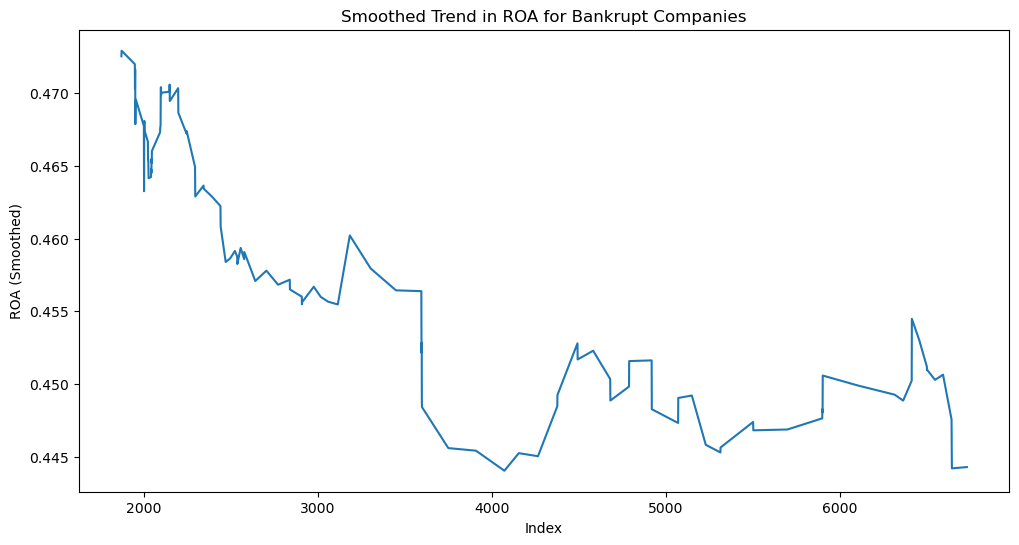

In [37]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the rolling mean with a window size of 100
bankrupt_companies['ROA(A) smoothed'] = bankrupt_companies['ROA(A) before interest and % after tax'].rolling(window=100).mean()

# Plot the smoothed trend of ROA for bankrupt companies
plt.figure(figsize=(12, 6))
sns.lineplot(data=bankrupt_companies, x=bankrupt_companies.index, y='ROA(A) smoothed')
plt.title('Smoothed Trend in ROA for Bankrupt Companies')
plt.xlabel('Index')
plt.ylabel('ROA (Smoothed)')
plt.show()


In this step, we compare the smoothed Return on Assets (ROA) trends between bankrupt and non-bankrupt companies. First, we filter out the non-bankrupt companies from the dataset. Then, we calculate a rolling mean of the ROA for these non-bankrupt companies with a window size of 100, just as we did for the bankrupt companies. Finally, we plot the smoothed ROA trends for both groups on the same graph to visualize and compare their financial performance over time, highlighting differences in their financial trajectories.

C:\Users\eschneid\AppData\Local\Temp\ipykernel_5456\3084244643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_bankrupt_companies['ROA(A) smoothed'] = non_bankrupt_companies['ROA(A) before interest and % after tax'].rolling(window=100).mean()
C:\Users\eschneid\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eschneid\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

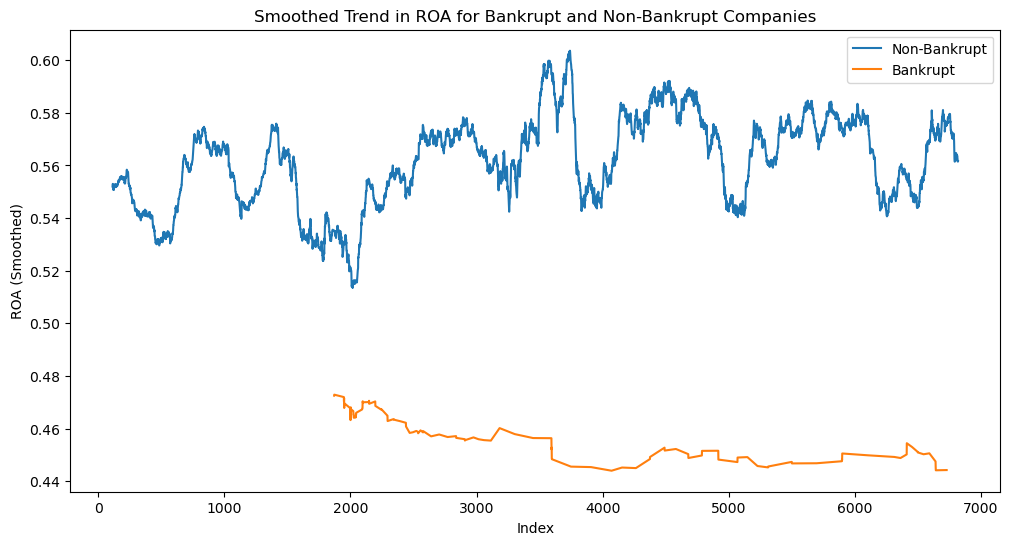

In [39]:
# Filter the non-bankrupt companies
non_bankrupt_companies = X[y['Bankrupt?'] == 0]

# Calculate the rolling mean for non-bankrupt companies
non_bankrupt_companies['ROA(A) smoothed'] = non_bankrupt_companies['ROA(A) before interest and % after tax'].rolling(window=100).mean()

# Plot the smoothed trend for both groups
plt.figure(figsize=(12, 6))
sns.lineplot(data=non_bankrupt_companies, x=non_bankrupt_companies.index, y='ROA(A) smoothed', label='Non-Bankrupt')
sns.lineplot(data=bankrupt_companies, x=bankrupt_companies.index, y='ROA(A) smoothed', label='Bankrupt')
plt.title('Smoothed Trend in ROA for Bankrupt and Non-Bankrupt Companies')
plt.xlabel('Index')
plt.ylabel('ROA (Smoothed)')
plt.legend()
plt.show()


In this step, we further analyze the dataset by performing the following tasks:

Count the Number of Companies: We count and print the number of bankrupt and non-bankrupt companies to understand the distribution of the target variable. Identify Extremes in ROA for Bankrupt Companies: We identify and print the highest and lowest ROA values among the bankrupt companies to understand the range of ROA within this group.
Identify Extremes in ROA for Non-Bankrupt Companies: Similarly, we identify and print the highest and lowest ROA values among the non-bankrupt companies to understand the range of ROA within this group.
This analysis helps us to observe the variability and extremities in financial performance between the two groups.

In [40]:
# Count the number of bankrupt vs. non-bankrupt companies
bankrupt_count = y['Bankrupt?'].value_counts()
print(f"Number of bankrupt companies: {bankrupt_count[1]}")
print(f"Number of non-bankrupt companies: {bankrupt_count[0]}")

# Find the highest and lowest ROA values for bankrupt companies
highest_roa_bankrupt = bankrupt_companies.loc[bankrupt_companies['ROA(A) before interest and % after tax'].idxmax()]
lowest_roa_bankrupt = bankrupt_companies.loc[bankrupt_companies['ROA(A) before interest and % after tax'].idxmin()]
print(f"Highest ROA for Bankrupt Company: {highest_roa_bankrupt['ROA(A) before interest and % after tax']}")
print(f"Lowest ROA for Bankrupt Company: {lowest_roa_bankrupt['ROA(A) before interest and % after tax']}")

# Find the highest and lowest ROA values for non-bankrupt companies
highest_roa_non_bankrupt = non_bankrupt_companies.loc[non_bankrupt_companies['ROA(A) before interest and % after tax'].idxmax()]
lowest_roa_non_bankrupt = non_bankrupt_companies.loc[non_bankrupt_companies['ROA(A) before interest and % after tax'].idxmin()]
print(f"Highest ROA for Non-Bankrupt Company: {highest_roa_non_bankrupt['ROA(A) before interest and % after tax']}")
print(f"Lowest ROA for Non-Bankrupt Company: {lowest_roa_non_bankrupt['ROA(A) before interest and % after tax']}")


Number of bankrupt companies: 220
Number of non-bankrupt companies: 6599
Highest ROA for Bankrupt Company: 0.582860880941997
Lowest ROA for Bankrupt Company: 0.0
Highest ROA for Non-Bankrupt Company: 1.0
Lowest ROA for Non-Bankrupt Company: 0.0069232446576537


In this step, we visualize the data using the following plots:

Bar Plot for the Number of Bankrupt vs Non-Bankrupt Companies:

We create a bar plot to display the count of bankrupt and non-bankrupt companies. This visualization helps to quickly compare the distribution of the two categories.
Scatter Plot of ROA vs. Operating Profit Rate:

We generate a scatter plot to visualize the relationship between 'ROA(A) before interest and % after tax' and 'Operating Profit Rate' for both bankrupt and non-bankrupt companies. This plot helps to identify any potential patterns or differences in how these two financial metrics are related across the two groups.
These visualizations aid in identifying trends and relationships in the dataset, providing a clearer picture of the differences and similarities between bankrupt and non-bankrupt companies.

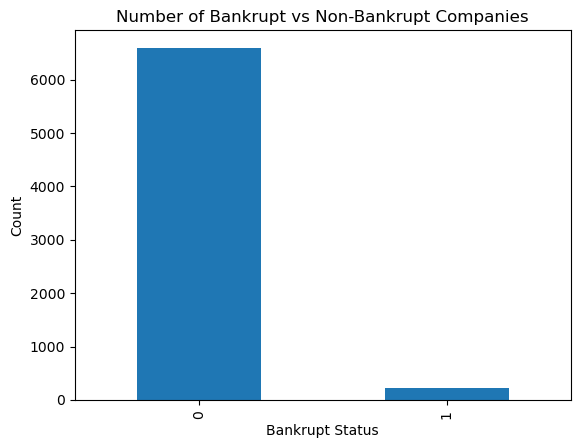

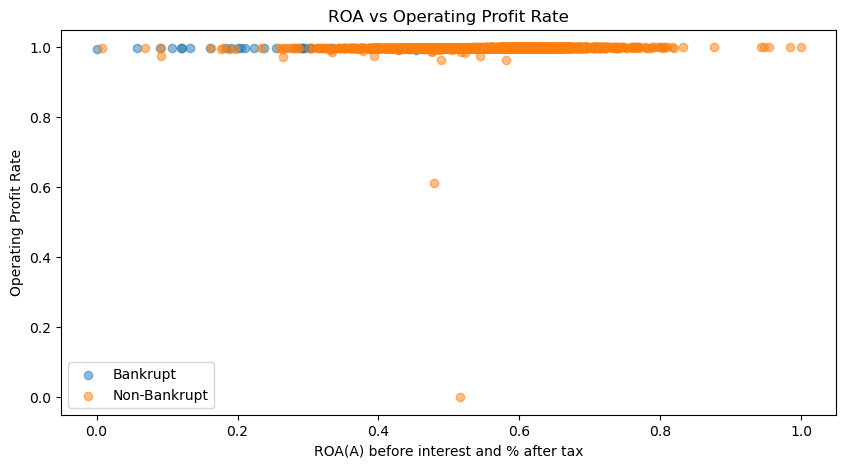

In [41]:
import matplotlib.pyplot as plt

# Bar plot for the number of bankrupt vs. non-bankrupt companies
bankrupt_count.plot(kind='bar', title='Number of Bankrupt vs Non-Bankrupt Companies')
plt.xlabel('Bankrupt Status')
plt.ylabel('Count')
plt.show()

# Scatter plot of ROA vs. another interesting feature (e.g., Operating Profit Rate)
plt.figure(figsize=(10, 5))
plt.scatter(bankrupt_companies['ROA(A) before interest and % after tax'], bankrupt_companies['Operating Profit Rate'], label='Bankrupt', alpha=0.5)
plt.scatter(non_bankrupt_companies['ROA(A) before interest and % after tax'], non_bankrupt_companies['Operating Profit Rate'], label='Non-Bankrupt', alpha=0.5)
plt.xlabel('ROA(A) before interest and % after tax')
plt.ylabel('Operating Profit Rate')
plt.title('ROA vs Operating Profit Rate')
plt.legend()
plt.show()


In conclusion, through comprehensive analysis and visualization of the Taiwanese Bankruptcy Prediction dataset, we've uncovered significant insights into financial indicators associated with bankruptcy risk. Our findings highlight the importance of metrics like Return on Assets (ROA) and operational efficiency in assessing a company's financial health and predicting potential distress. By leveraging these insights, stakeholders can make informed decisions to mitigate risks and ensure long-term financial stability.